# Algoritmo de regresión lineal.

## ¿Que es la regresión lineal y para que sirve?
El análisis de regresión lineal es una técnica estadística utilizada para estudiar la relación entre variables. Se adapta a una amplia variedad de situaciones. En la investigación social, el análisis de regresión se utiliza para predecir un amplio rango de fenómenos, desde medidas económicas hasta diferentes aspectos del comportamiento humano. En el contexto de la investigación de mercados puede utilizarse para determinar en cuál de diferentes medios de comunicación puede reusltar más eficaz invertir; o para predecir el número de ventas de un determinado producto.

In [17]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [7]:
car_prices = [5,6,7,8,9,10]
units_sold = [8.5, 8.0, 7.5, 7, 6.5, 6.0]

### graficar en matplotlib:
plt.scatter(eje x, eje y)

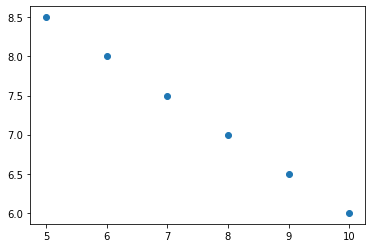

In [8]:
plt.scatter(car_prices, units_sold)

Para convertir un array de numpy a tensor, se debe reestructurar para que pueda ser transformado en tensor.

In [10]:
prices_array = np.array(car_prices).reshape(-1,1)
units_array = np.array(units_sold).reshape(-1,1)
prices_array

array([[ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

### Cambiar numpy array a tensor.

In [13]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

### Función Linear.
Esta función aplica una transformación lineal a todos los datos que se ingresan.

Parametros: Linear(in_features, out_features, bias)

- in_features: Tamaño del dato de entrada.
- out_features: tamaño del dato de salida.
- bias: No lo entendí :v

[Documentación oficial función Lineal](https://pytorch.org/docs/stable/nn.html?highlight=linear#torch.nn.Linear)

### Función MSELoss (mean squared error).
Esta función halla el error promedio al cuadrado, entre los valores de entrada y valores de salida.

[MSELoss documentación](https://pytorch.org/docs/stable/nn.html?highlight=mseloss#torch.nn.MSELoss)

### Función SGD (Stochastic Gradient Descent).

Nos ayuda a calcular el gradiente, en este utilizaremos un lote de los datos.
model.parameters() son los pesos los cuales iremos modificando en el modelo.
lr = learning rate = son los pasos que hago para minimizar mi pérdida

[SGD Documentación](https://pytorch.org/docs/stable/optim.html?highlight=optim%20sgd#torch.optim.SGD)

0.01863473653793335


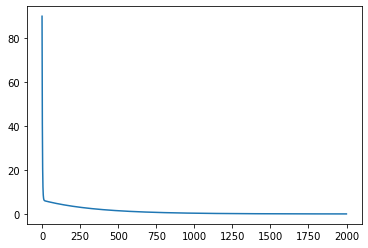

In [25]:
model = nn.Linear(1,1)
loss_function = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr = 0.015)

losses = []
iterations = 2000

for i in range(iterations):
    pred = model(prices)
    loss = loss_function(pred, units)
    losses.append(loss.data)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(float(loss))
plt.plot(range(iterations), losses)
    

#### Predicciones.

In [27]:
x = torch.Tensor([14.0])
p = model(x)
p


tensor([4.4765], grad_fn=<AddBackward0>)